In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

color = sns.color_palette()

In [7]:
df = pd.read_csv('G:\My Drive\Jun\Mechine Learning\Data Science\Capstone 3\Modeling1.csv')
df.head()

,Unnamed: 0,Issue,Consumer complaint narrative,Company,State,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
0,22,Problem when making payments,I was shocked when I reviewed my credit report...,JPMORGAN CHASE & CO.,MS,Consent provided,Web,2019-02-27,Closed with explanation,Yes,NaN
1,102,Getting a credit card,I have been in USA two times as XXXX student (...,DISCOVER BANK,PA,Consent provided,Web,2019-02-24,Closed with non-monetary relief,Yes,NaN
2,175,Problem with a purchase shown on your statement,"On XX/XX/XXXX, Bank of America mailed out a ca...","BANK OF AMERICA, NATIONAL ASSOCIATION",CA,Consent provided,Web,2019-01-10,Closed with monetary relief,Yes,NaN
3,216,Closing your account,I was using my chase credit card like a regula...,JPMORGAN CHASE & CO.,NJ,Consent provided,Web,2019-06-27,Closed with explanation,Yes,NaN
4,310,Problem with a purchase shown on your statement,On a letter dated XX/XX/XXXX Chase states they...,JPMORGAN CHASE & CO.,TX,Consent provided,Web,2018-12-31,Closed with explanation,Yes,NaN


In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54687 entries, 0 to 54686
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Issue                         54687 non-null  object
 1   Consumer complaint narrative  54687 non-null  object
 2   Company                       54687 non-null  object
 3   State                         54431 non-null  object
 4   Consumer consent provided?    54687 non-null  object
 5   Submitted via                 54687 non-null  object
 6   Date sent to company          54687 non-null  object
 7   Company response to consumer  54687 non-null  object
 8   Timely response?              54687 non-null  object
 9   Consumer disputed?            18838 non-null  object
dtypes: object(10)
memory usage: 4.2+ MB


In [9]:
df1 = df[df['Consumer disputed?'] == 'No']
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14582 entries, 35849 to 54686
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Issue                         14582 non-null  object
 1   Consumer complaint narrative  14582 non-null  object
 2   Company                       14582 non-null  object
 3   State                         14541 non-null  object
 4   Consumer consent provided?    14582 non-null  object
 5   Submitted via                 14582 non-null  object
 6   Date sent to company          14582 non-null  object
 7   Company response to consumer  14582 non-null  object
 8   Timely response?              14582 non-null  object
 9   Consumer disputed?            14582 non-null  object
dtypes: object(10)
memory usage: 1.2+ MB


In [ ]:
df1['Company response to consumer'].value_count()

In [10]:
df2 = df1[~df1['Company response to consumer'].isin(['Closed', 'Untimely response'])]
df2['Company response to consumer'].value_counts()

Closed with explanation            8780
Closed with monetary relief        3827
Closed with non-monetary relief    1869
Name: Company response to consumer, dtype: int64

In [ ]:
df2.info()

In [11]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from textblob import TextBlob
from nltk.stem import PorterStemmer,SnowballStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer

from io import StringIO
import os
import string
#import gensim
#from gensim.models import Word2Vec
import itertools
import scipy
from scipy import spatial
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')   

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Converting text data to lower case

In [ ]:
df.info()

In [15]:
df2['Consumer complaint narrative'] =df2['Consumer complaint narrative'].apply(lambda x: ' '.join([i.lower() for i in x.split()]))

In [ ]:
df['Consumer complaint narrative'].sample(2)

#### Removing punctuations

In [16]:
df2['Consumer complaint narrative'] =df2['Consumer complaint narrative'].str.replace(r'[^\w\s]',"")

In [ ]:
df['Consumer complaint narrative'].sample(2)

#### Text standardization

In [ ]:
#Below, we used three normalizazion dictionaries from these links :
#http://www.hlt.utdallas.edu/~yangl/data/Text_Norm_Data_Release_Fei_Liu/
#http://people.eng.unimelb.edu.au/tbaldwin/etc/emnlp2012-lexnorm.tgz
#http://luululu.com/tweet/typo-corpus-r1.txt
dico = {}
dico1 = open('doc1.txt', 'rb')
for word in dico1:
    word = word.decode('utf8')
    word = word.split()
    dico[word[1]] = word[3]
dico1.close()
dico2 = open('doc2.txt', 'rb')
for word in dico2:
    word = word.decode('utf8')
    word = word.split()
    dico[word[0]] = word[1]
dico2.close()
dico3 = open('doc3.txt', 'rb')
for word in dico3:
    word = word.decode('utf8')
    word = word.split()
    dico[word[0]] = word[1]
dico3.close()

In [ ]:
def txt_std(words):
    list_words = words.split()
    for i in range(len(list_words)):
        if list_words[i] in dico.keys():
            list_words[i] = dico[list_words[i]]
    return ' '.join(list_words)

In [ ]:
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].apply(txt_std)

In [ ]:
df['Consumer complaint narrative'].head(1)

In [17]:
df2['Consumer complaint narrative'] = df2['Consumer complaint narrative'].str.replace(r"xx+\s","")

In [ ]:
df['Consumer complaint narrative'].head(1)


#### Removing stopwords

In [18]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df2['Consumer complaint narrative'] =df2['Consumer complaint narrative'].apply(lambda x: ' '.join([i for i in x.split() if i not in stop]))

In [ ]:
df['Consumer complaint narrative'].head(1)


#### Correcting spelling

In [ ]:
#conda install -c conda-forge textblob

In [ ]:
#mport textblob

In [ ]:
##ensure text is standardized before applying this step #this step takes quite a long time.
#from textblob import TextBlob - almost impossible on my computer!!!!!712AM
df2['Consumer complaint narrative'] =df2['Consumer complaint narrative'].apply(lambda x: str(TextBlob(x).correct()))

#### Lemmatizing

In [19]:
# from textblob import Word

df2['Consumer complaint narrative'] =df2['Consumer complaint narrative'].apply(lambda x:' '.join([Word(i).lemmatize() for i in x.split()]))

In [ ]:
df['Consumer complaint narrative'].head(1)


### Modeling

#### Train/Test split

In [20]:
X = df2['Consumer complaint narrative']
y = df2['Company response to consumer']

In [21]:
##label encoding target variable
enc = preprocessing.LabelEncoder()
y = enc.fit_transform(y)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=df2['Company response to consumer'], random_state=42)

#### Feature engineering of consumer complaint with TF-IDF

In [23]:
##tf-idf verctor representation
tfidf_vect = TfidfVectorizer(max_features=50000,analyzer='word', token_pattern=r'\w{1,}') #
tfidf_vect.fit(df['Consumer complaint narrative'])
xtrain_tfidf =  tfidf_vect.transform(X_train) #X_train
xtest_tfidf =  tfidf_vect.transform(X_test) #X_test

In [24]:
X_train.shape, y_train.shape

((10857,), (10857,))

In [25]:
xtest_tfidf.shape, y_test.shape

((3619, 42511), (3619,))

In [26]:
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
lr_params = {'C':[int(x) for x in np.linspace(1,10,10)]}
grid_lr = GridSearchCV(estimator=clf,param_grid=lr_params,cv=5,n_jobs=-1)
grid_lr.fit(xtrain_tfidf,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [27]:
GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       iid='warn', n_jobs=-1,
       param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)#fit_params=None,

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(multi_class='warn', solver='warn'),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score='warn')

In [28]:
print(grid_lr.best_params_)
print(grid_lr.best_score_)

{'C': 1}
0.6622459712958274


In [29]:
final_lr = LogisticRegression(C=1)
final_lr.fit(xtrain_tfidf,y_train)

LogisticRegression(C=1)

In [30]:
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=1, multi_class='warn', solver='warn')

In [31]:
y_pred_lr = final_lr.predict(xtest_tfidf)
lr_accuracy = metrics.accuracy_score(y_pred_lr, y_test)
print ("Logistic Regression > Accuracy: ", lr_accuracy)

Logistic Regression > Accuracy:  0.6499032882011605


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr, target_names=df2['Company response to consumer'].unique()))#

                                 precision    recall  f1-score   support

    Closed with monetary relief       0.67      0.87      0.76      2195
        Closed with explanation       0.57      0.42      0.49       957
Closed with non-monetary relief       0.60      0.09      0.15       467

                       accuracy                           0.65      3619
                      macro avg       0.62      0.46      0.47      3619
                   weighted avg       0.64      0.65      0.61      3619



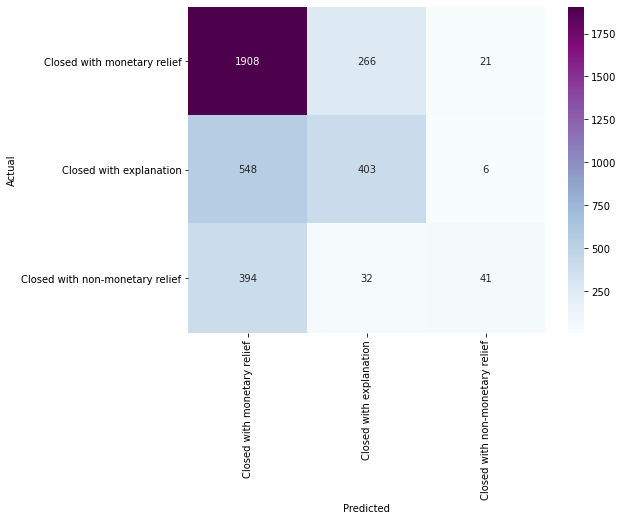

In [33]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred_lr)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="BuPu",xticklabels=df2['Company response to consumer'].unique(),yticklabels=df2['Company response to consumer'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## SVM

In [34]:
from sklearn.svm import LinearSVC
svc_model = LinearSVC()
svc_params = {'C':[0.01,0.1, 1, 10, 100, 1000]}
grid_svc = GridSearchCV(estimator=svc_model,param_grid=svc_params,cv=5,n_jobs=-1)
grid_svc.fit(xtrain_tfidf,y_train)

GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]})

In [35]:
GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       iid='warn', n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

GridSearchCV(cv=5, error_score='raise-deprecating', estimator=LinearSVC(),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score='warn')

In [36]:
print(grid_svc.best_params_)
print(grid_svc.best_score_)

{'C': 0.1}
0.665009505001896


In [37]:
final_svc = LinearSVC(C=0.1)
final_svc.fit(xtrain_tfidf,y_train)

LinearSVC(C=0.1)

In [38]:
LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

LinearSVC(C=0.1)

In [39]:
y_pred_svc = final_svc.predict(xtest_tfidf)
svc_accuracy = metrics.accuracy_score(y_pred_svc, y_test)
print ("SVC > Accuracy: ", svc_accuracy)

SVC > Accuracy:  0.6521138436032053


In [40]:
print(classification_report(y_test, y_pred_svc,target_names=df2['Company response to consumer'].unique()))

                                 precision    recall  f1-score   support

    Closed with monetary relief       0.66      0.89      0.76      2195
        Closed with explanation       0.59      0.40      0.47       957
Closed with non-monetary relief       0.79      0.05      0.09       467

                       accuracy                           0.65      3619
                      macro avg       0.68      0.45      0.44      3619
                   weighted avg       0.66      0.65      0.60      3619



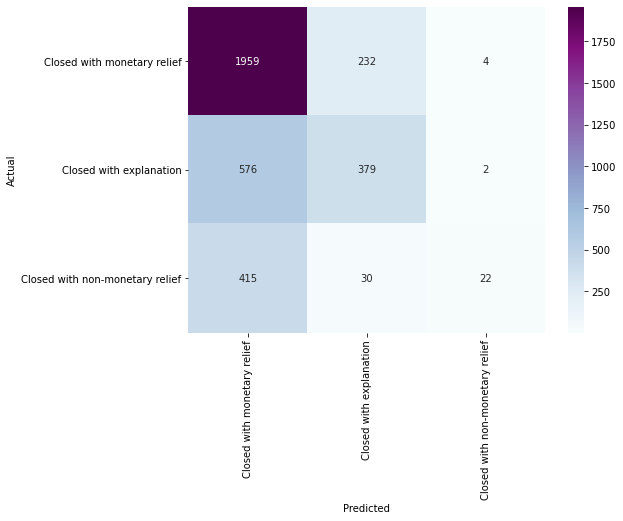

In [41]:
conf_mat = confusion_matrix(y_test, y_pred_svc)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="BuPu",xticklabels=df2['Company response to consumer'].unique(),yticklabels=df2['Company response to consumer'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## XGBOOST

In [ ]:
#pip install xgboost

In [ ]:
import xgboost
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, reg_alpha=4, eta=0.3, silent=1, subsample=0.8)
xgb_model.fit(xtrain_tfidf, y_train)

In [ ]:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, eta=0.3, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=50, min_child_weight=1, missing=None,
       n_estimators=80, n_jobs=1, nthread=None, objective='multi:softprob',
       random_state=0, reg_alpha=4, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=1, subsample=0.8)

In [ ]:
y_pred_xgb = xgb_model.predict(xtest_tfidf)
xgb_accuracy = metrics.accuracy_score(y_pred_xgb, y_test)
print ("XGBoost > Accuracy: ", xgb_accuracy)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb,target_names=df2['Company response to consumer'].unique()))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb,target_names=df2['Company response to consumer'].unique()))

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred_xgb)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="BuPu",xticklabels=df2['Company response to consumer'].unique(),yticklabels=df2['Company response to consumer'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Deep Learning Models

In [ ]:
!pip install keras

In [2]:
pip install keras==2.3.0

  Attempting uninstall: keras
    Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install tensorflow

In [4]:
print(tensorflow.__version__)

NameError: name 'tensorflow' is not defined

In [5]:
import tensorflow

ImportError: Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 64, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: The specified module could not be found.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [3]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from keras.models import Model
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.layers import Dense, Input, Flatten, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Sequential

Using TensorFlow backend.


ImportError: Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 64, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: The specified module could not be found.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

Using TensorFlow backend.

In [ ]:
#total_complaints = np.append(train_x.values,valid_x.values)
tokenizer = Tokenizer(num_words=25000)
tokenizer.fit_on_texts(X_train.values)#total_complaints
train_sequences = tokenizer.texts_to_sequences(X_train.values)
test_sequences = tokenizer.texts_to_sequences(X_test.values)

In [ ]:
word_index = tokenizer.word_index# dictionary containing words and their index
print('Found %s unique tokens.' % len(word_index))

In [ ]:
MAX_SEQUENCE_LENGTH = max([len(c.split()) for c in total_complaints])
MAX_SEQUENCE_LENGTH

In [ ]:
train_data = pad_sequences(train_sequences, maxlen=max_length,padding='post')
test_data = pad_sequences(test_sequences, maxlen=max_length,padding='post')

In [ ]:
print(train_data.shape)
print(test_data.shape)

In [ ]:
# No need to conduct this step because we did this before test train split
#enc = preprocessing.LabelEncoder()
#train_labels = enc.fit_transform(train_y)
#test_labels = enc.fit_transform(valid_y)

In [ ]:
print(enc.classes_)
print(np.unique(train_labels, return_counts=True))
print(np.unique(test_labels, return_counts=True))

In [ ]:
labels_train = to_categorical(np.asarray(train_labels))
labels_test = to_categorical(np.asarray(test_labels))
print('Shape of data tensor:', train_data.shape)
print('Shape of label tensor:', labels_train.shape)
print('Shape of label tensor:', labels_test.shape)

## CNN w/pre-trained word embeddings (GloVe)

In [ ]:
#wget http://nlp.stanford.edu/data/glove.6B.zip
GLOVE_DIR = '/mnt/data/temp/nlp/'
embeddings_index = {}
f = open(os.path.join(GLOVE_DIR, 'glove.6B.300d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

In [ ]:
EMBEDDING_DIM = 300
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [ ]:
[(k,v) for k,v in word_index.items() if v==4]

In [ ]:
embedding_matrix[4]  ## word embedded vector representation for token 'loan'

In [ ]:
vocab_size = len(tokenizer.word_index)+1

In [ ]:
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True))
model.add(Dropout(0.3))
model.add(Conv1D(128, 5, activation="relu"))
model.add(MaxPooling1D(5))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Conv1D(128, 5, activation="relu"))
model.add(MaxPooling1D(5))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(11, activation="softmax"))
model.compile(loss='categorical_crossentropy',
 optimizer="rmsprop",
 metrics=['acc'])

In [ ]:
history = model.fit(train_data, labels_train,
 batch_size=64,
 epochs=8,
 validation_data=(test_data, labels_test))

In [ ]:
fig1 = plt.figure()
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :CNN',fontsize=16)
plt.show()

In [ ]:
#predictions on test data
predicted=model.predict(test_data)
predicted

In [ ]:
#model evaluation
import sklearn
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(labels_test, predicted.round())
print('precision: \n{}'.format(precision))
print('recall: \n{}'.format(recall))
print('fscore: \n{}'.format(fscore))
print('support: \n{}'.format(support))

In [ ]:
print(classification_report(labels_test, predicted.round(),target_names=df2['Company response to consumer'].unique()))

In [ ]:
#The Embedding layer requires the specification of the vocabulary size (vocab_size), 
#the size of the real-valued vector space EMBEDDING_DIM = 100,
#and the maximum length of input documents max_length .
vocab_size = len(tokenizer.word_index)+1
EMBEDDING_DIM = 300
max_length = 394

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size,
 300,
 input_length=max_length
 ))
model.add(Dropout(0.3))
model.add(Conv1D(128, 5, activation="relu"))
model.add(MaxPooling1D(5))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Conv1D(128, 5, activation="relu"))
model.add(MaxPooling1D(5))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(11, activation="softmax"))
model.compile(loss='categorical_crossentropy',
 optimizer="rmsprop",
 metrics=['acc'])

In [ ]:
history = model.fit(train_data, labels_train,
 batch_size=64,
 epochs=8,
 validation_data=(test_data, labels_test))

In [ ]:
fig1 = plt.figure()
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :CNN',fontsize=16)
plt.show()

In [ ]:
fig1 = plt.figure()
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training acc', 'Validation acc'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves :CNN',fontsize=16)
plt.show()

In [ ]:
#predictions on test data
predicted=model.predict(test_data)
predicted

In [ ]:
#model evaluation
import sklearn
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(labels_test, predicted.round())
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print("############################")
print(sklearn.metrics.classification_report(labels_test, predicted.round()))

## RNN

In [ ]:
#Bidirectional LSTM

model = Sequential()
model.add(Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True))
model.add(Bidirectional(LSTM(100, dropout_U = 0.2, dropout_W = 0.2)))
model.add(Dense(11,activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])



In [ ]:
history = model.fit(train_data, labels_train,
 batch_size=64,
 epochs=8,
 validation_data=(test_data, labels_test))

In [ ]:
fig1 = plt.figure()
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :RNN - LSTM',fontsize=16)
plt.show()

In [ ]:
fig1 = plt.figure()
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training acc', 'Validation acc'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves :RNN - LSTM',fontsize=16)
plt.show()

In [ ]:
#predictions on test data
predicted=model.predict(test_data)
predicted

In [ ]:
#model evaluation
import sklearn
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(labels_test, predicted.round())
print('precision: \n{}'.format(precision))
print('recall: \n{}'.format(recall))
print('fscore: \n{}'.format(fscore))
print('support: \n{}'.format(support))
print("############################")


In [ ]:
print(classification_report(labels_test, predicted.round(),target_names=df2['Company response to consumer'].unique()))

Companies can categorize their response to a complaint in a number of ways.
• Closed with monetary relief: The steps taken included objective, measurable, and verifiable
monetary relief to the consumer as a direct result of the steps taken or that will be taken in
response to the complaint.
• Closed with non-monetary relief: The steps taken by the company in response to the complaint
did not result in monetary relief, but may have addressed some or all of the consumer’s
complaint involving non-monetary requests.
• Closed with explanation: The steps taken by the company in response to the complaint included
an explanation that was tailored to the individual consumer’s complaint. For example, this
category would be used if the explanation substantively meets the consumer’s desired
resolution or explains why no further action will be taken.
• Closed: The company closed the complaint without relief – monetary or non-monetary – or
explanation.
• In progress: The company’s indication that the complaint could not be closed within 15 calendar
days and that its final responsive explanation to the consumer will be provided through the
portal at a later date.
• Closed with relief: The steps taken included objective, measurable, and verifiable monetary
relief to the consumer as a direct result of the steps taken or that will be taken in response to
the complaint.  Company response option piloted December 1, 2011 through May 31, 2012
• Closed without relief: The steps taken did not include objective, measurable, and verifiable
monetary relief to the consumer as a direct result of the steps taken or that will be taken in
response to the complaint.  Company response option piloted December 1, 2011 through May
31, 2012

-- https://files.consumerfinance.gov/f/201303_cfpb_Consumer-Complaint-Database-Fact-Sheet.pdf